1. Describe how path finding from a particular hexagonal grid location A to another
hexagonal grid location B can be expressed as a search problem. Be precise about the
formulation and use the one of the coordinate systems described above in order to
illustrate this formulation with a particular example. (Basic - 2 points)

Solution to Qestion No. - 01

#### Hexagonal Grids:

Hexagons are 6-sided polygons. Regular hexagons have all the sides the same length. I'll assume all the hexagons we're working with here are regular. The typical orientations for hex grids are vertical columns ( flat-taped) and horizontal rows (pointly-taped).

Hexagons have 6 sides and 6 corners. Each side is shared by 2 hexagons. Each corner is shared by 3 hexagons. 



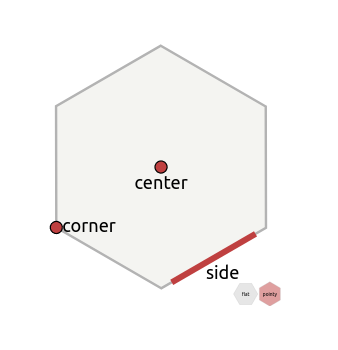

#### Angles:
- In a regular hexagon the interior angles are 120°. There are six “wedges”, each an equilateral triangle with 60° angles inside. Each corner is size units away from the center. 

- To fill a hexagon, gather the polygon vertices at hex_corner(…, 0) through hex_corner(…, 5). To draw a hexagon outline, use those vertices, and then draw a line back to hex_corner(…, 0).

- The difference between the two orientations is a rotation, and that causes the angles to change:
angles are 0°, 60°, 120°, 180°, 240°, 300° and

- angles are 30°, 90°, 150°, 210°, 270°, 330°. Note that the diagrams on this page use the y axis pointing down (angles increase clockwise); you may have to make some adjustments if your y axis points up (angles increase counterclockwise).

- In math, the "circumradius" is the distance from the center to a corner (I call this size); the "inradius" is the distance from the center to the middle of an edge. The "maximal diameter" is twice the circumradius; the "minimal diameter" is twice the inradius. Wikipedia has more.

#### Size & Spacing:
- Next we want to put several hexagons together. The size is the distance from the center to any corner. In the pointy orientation, a hexagon has width w = sqrt(3) * size and height h = 2 * size. The sqrt(3) comes from sin(60°).

- The horizontal distance between adjacent hexagon centers is w. The vertical distance between adjacent hexagon centers is h * 3/4.

- Some games use pixel art for hexagons that does not match an exactly regular polygon. The angles and spacing formulas I describe in this section won't match the sizes of your hexagons. The rest of the article, describing algorithms on hex grids, will work even if your hexagons are stretched or shrunk a bit, and I explain on the implementation page how to handle stretching.

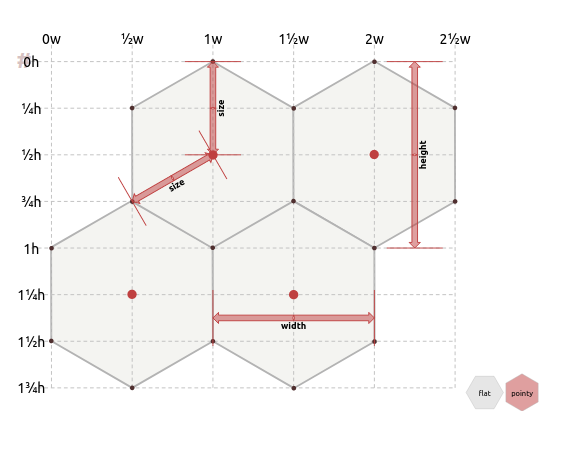

#### Cube coordinates

- Since cube hexagonal coordinates are based on 3d cube coordinates, we can adapt the distance calculation to work on hexagonal grids. Each hexagon corresponds to a cube in 3d space. Adjacent hexagons are distance 1 apart in the hex grid but distance 2 apart in the cube grid. For every 2 steps in the cube grid, we need only 1 step in the hex grid. In the 3d cube grid, Manhattan distances are abs(dx) + abs(dy) + abs(dz).

- How do we draw a line from one hex to another? I use linear interpolation for line drawing. Evenly sample the line at N+1 points, and figure out which hexes those samples are in.

- First we calculate N=10 to be the hex distance between the endpoints.
- Then evenly sample N+1 points between point A and point B. Using linear interpolation, each point will be A + (B - A) * 1.0/N * i, for values of i from 0 to N, inclusive. In the diagram these sample points are the dark blue dots. This results in floating point coordinates.
- Convert each sample point (float) back into a hex (int). The algorithm is called cube_round.

- Putting these together to draw a line to find path from hexagon A to hexagon B.

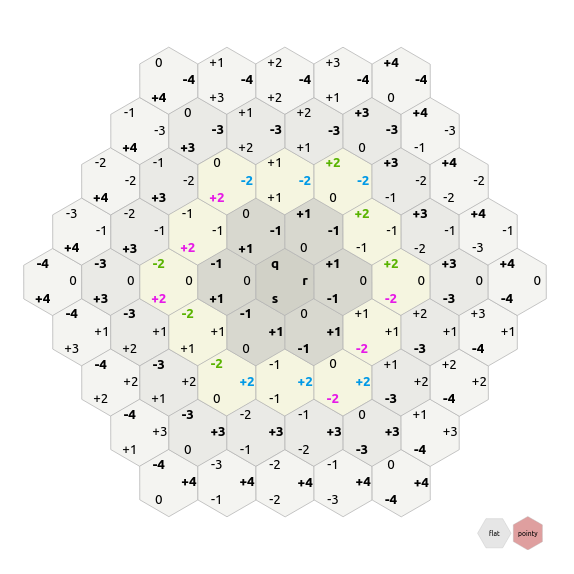

2. Assume that some hexagonal locations contain an obstacles. Show how you can
calculate a "distance" between two hexagonal locations and describe how it could be
used as a heuristic for informed search strategies for the path finding problem with
obstacles (Basic - 2 points)

- Solution to Question 02

#### Obstacles 

- If there are obstacles, the simplest thing to do is a distance-limited flood fill (breadth first search). In this diagram, the limit is set to moves. In the code, fringes[k] is an array of all hexes that can be reached in k steps. Each time through the main loop, we expand level k-1 into level k. This works equally well with any of the hex coordinate systems (cube, axial, offset, doubled).

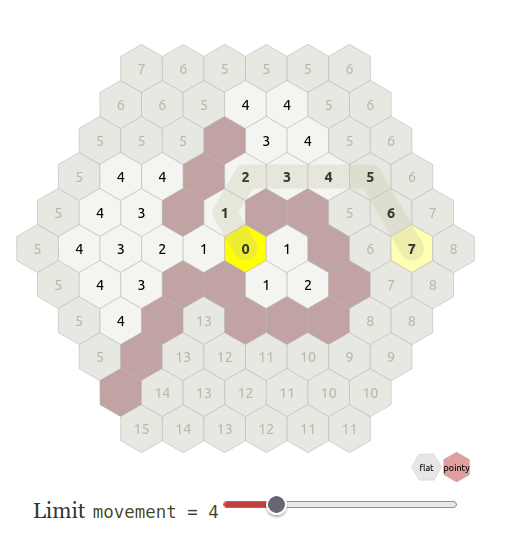

- Given a hex, which 6 hexes are neighboring it? As anyone might expect, the answer is simplest with cube coordinates, still pretty simple with axial coordinates, and slightly trickier with offset coordinates. We might also want to calculate the 6 “diagonal” hexes.

#### Calculation of distance between two points

#### Cube coordinates

- Moving one space in hex coordinates involves changing one of the 3 cube coordinates by +1 and changing another one by -1 (the sum must remain 0). There are 3 possible coordinates to change by +1, and 2 remaining that could be changed by -1. This results in 6 possible changes. Each corresponds to one of the hexagonal directions. 

- With the Cube coordinate systems, we can store differences between two coordinates (a "vector"), and then add those differences back to a coordinate to get another coordinate. That's what the cube_add function does. Axial and Doubled coordinates also support this, but the Offset coordinates do not.

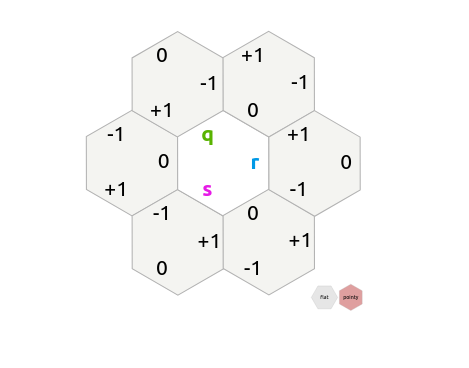

3. Write code that given two hexagonal grid coordinates finds a path that connects them
using uninformed search strategies (Expected - 2 points)

- Solution to question 03

- In uninfomred search startegies we are not informing the algorithm any informed decision so that it can go for the randomized path. In our code, we are initiating a hexagon. Then, we are finding the path using manual procedue of getting the distances every now and then.It's more like a trial and error method which is quite time consuming. Then we can apply the co-ordinate of any other hexagonal grid to find the path that connects them using uninfomed search.


#### Two hexagonal grid coordinates finds a path that connects them using uninformed search strategies

In [1]:
# Python code to find number of unique paths in a
# matrix with obstacles.
 
def uniquePathsWithObstacles(A):
 
    # create a 2D-matrix and initializing with value 0
    paths = [[0]*len(A[0]) for i in A]
     
    # initializing the left corner if no obstacle there
    if A[0][0] == 0:
        paths[0][0] = 1
     
    # initializing first column of the 2D matrix
    for i in range(1, len(A)):
         
        # If not obstacle
        if A[i][0] == 0:
            paths[i][0] = paths[i-1][0]
             
    # initializing first row of the 2D matrix
    for j in range(1, len(A[0])):
         
        # If not obstacle
        if A[0][j] == 0:
            paths[0][j] = paths[0][j-1]
             
    for i in range(1, len(A)):
        for j in range(1, len(A[0])):
 
            # If current cell is not obstacle
            if A[i][j] == 0:
                paths[i][j] = paths[i-1][j] + paths[i][j-1]
 
    # returning the corner value of the matrix
    return paths[-1][-1]
 
 
# Driver Code
A = [[0, 0, 0], [0, 1, 0], [0, 0, 0]]
print(uniquePathsWithObstacles(A))

2


4. Write code that given two cells in a hexagonal grid expressed by their corresponding
grid coordinates and a list of obstacles (expressed by their corresponding grid
coordinates) finds a path that connects them and avoids obstacles using greedy and
A*-search. Use an appropriately defined distance on the hexagonal grid for guiding the
A* search (Expected - 2 points).

- Solution to Question 04

#### Hexagon grid 

- A* is a complete and optimal algorithm. That means if any solution exists it will always find it and we are sure that it will always be the shortest path. So, it looks like this is what we need. 

- So, we’ve already explained how the A * algorithm works. Now, let’s replace our tiles with a hex grid. 

- A* operations on the hex grid are pretty much the same. The main change that will appear on the hex grid is how to use coordinates. We can’t just use x and y coordinates, because every second row is shifted by half-a-length. The solution is to add a third dimension and describe the hex grid by using cube coordinates. 

- You can imagine it as a cube grid which we slice to create a diagonal plane.

#### A* Algorithm 

 

- How does the A* algorithm work? The algorithm begins by having the starting tile in its open list, then it repeats the following steps until it finds a target: 

- Take a tile from the open list. 
- Add this tile to the closed list. 
- For every walkable adjacent tile of this tile:
- If an adjacent tile is in the closed list – ignore it.
- If an adjacent tile is not in the open list – add it to the open list. 
- If an adjacent tile is already in the open list – check if its F parameter will be lower when we use the current path, if it is – update the adjacent tile parameters. 

####  In our code, we are first trying to create a grid system where we can draw different shape. Then, we apply A* algorithm and create a boundary condition to find the optimum informed A* search algorithm. Let's go for the coding. In the comments, you will get to know how does it work.



In [2]:
!pip install pygame 

In [ ]:
import pygame                          #Let's import the necessary libraries at first
import math
from queue import PriorityQueue

#Let's first define the parameters to set A* path finding algorithm
WIDTH = 800                                             #Let's ste the game display width at the beginning
WIN = pygame.display.set_mode((WIDTH, WIDTH))
pygame.display.set_caption("A* Path Finding Algorithm")

#Let's define the color parametes

RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 255, 0)
YELLOW = (255, 255, 0)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
PURPLE = (128, 0, 128)
ORANGE = (255, 165 ,0)
GREY = (128, 128, 128)
TURQUOISE = (64, 224, 208)

#Let's define a class for declaring the total number of rows and columns

class Spot:                          #Let's first instantiate a class to furthur define instances such as widht, row, column, total rows
	def __init__(self, row, col, width, total_rows):
		self.row = row
		self.col = col
		self.x = row * width                   #Let's set the row and the column
		self.y = col * width
		self.color = WHITE                       #Let's set the color of the column
		self.neighbors = []                     #Let's set the number of neighbours
		self.width = width
		self.total_rows = total_rows             #Let's set the number of total rows

	def get_pos(self):                          #Let's set the color of a position of each colour appropriately
		return self.row, self.col

	def is_closed(self):
		return self.color == RED         

	def is_open(self):
		return self.color == GREEN

	def is_barrier(self):
		return self.color == BLACK

	def is_start(self):
		return self.color == ORANGE

	def is_end(self):
		return self.color == TURQUOISE

	def reset(self):
		self.color = WHITE

	def make_start(self):
		self.color = ORANGE

	def make_closed(self):
		self.color = RED

	def make_open(self):
		self.color = GREEN

	def make_barrier(self):
		self.color = BLACK

	def make_end(self):
		self.color = TURQUOISE

	def make_path(self):
		self.color = PURPLE
 
	def draw(self, win):                           #Let's now specify the draw function with neighbours
		pygame.draw.rect(win, self.color, (self.x, self.y, self.width, self.width))

	def update_neighbors(self, grid):              #Let's include a function for updating the neighbours
		self.neighbors = []
		if self.row < self.total_rows - 1 and not grid[self.row + 1][self.col].is_barrier(): # updating the neighbours DOWN
			self.neighbors.append(grid[self.row + 1][self.col])

		if self.row > 0 and not grid[self.row - 1][self.col].is_barrier(): # updating the neighbours UP
			self.neighbors.append(grid[self.row - 1][self.col])

		if self.col < self.total_rows - 1 and not grid[self.row][self.col + 1].is_barrier(): # updating the neighbours RIGHT
			self.neighbors.append(grid[self.row][self.col + 1])

		if self.col > 0 and not grid[self.row][self.col - 1].is_barrier(): # updating the neighbours LEFT
			self.neighbors.append(grid[self.row][self.col - 1])

	def __lt__(self, other):
		return False

#Lets start with two variable parametes to measure the distances

def h(p1, p2):
	x1, y1 = p1
	x2, y2 = p2
	return abs(x1 - x2) + abs(y1 - y2)

#Let's write a code for the reconstruction of the path

def reconstruct_path(came_from, current, draw):
	while current in came_from:
		current = came_from[current]
		current.make_path()
		draw()


def algorithm(draw, grid, start, end):               #Let's take a function to declare an algoritm to draw function.
	count = 0
	open_set = PriorityQueue()
	open_set.put((0, count, start))                  #Let's start counter
	came_from = {}
	g_score = {spot: float("inf") for row in grid for spot in row}
	g_score[start] = 0
	f_score = {spot: float("inf") for row in grid for spot in row}
	f_score[start] = h(start.get_pos(), end.get_pos())

	open_set_hash = {start}

	while not open_set.empty():                 #Let's write a while loop to quite the game when the grid is empty
		for event in pygame.event.get():
			if event.type == pygame.QUIT:
				pygame.quit()

		current = open_set.get()[2]             #Let's remove the the current postion to clear up the interface of the grid
        
		open_set_hash.remove(current)

		if current == end:                               
			reconstruct_path(came_from, end, draw)
			end.make_end()
			return True                               #Let's make  code to end the program

		for neighbor in current.neighbors:             #Let's create a for loop for current neighbors 
			temp_g_score = g_score[current] + 1

			if temp_g_score < g_score[neighbor]:
				came_from[neighbor] = current
				g_score[neighbor] = temp_g_score
				f_score[neighbor] = temp_g_score + h(neighbor.get_pos(), end.get_pos())
				if neighbor not in open_set_hash:
					count += 1
					open_set.put((f_score[neighbor], count, neighbor))
					open_set_hash.add(neighbor)
					neighbor.make_open()

		draw()             # Let's call the draw function

		if current != start:
			current.make_closed()  #Let's write a closing program to end the loop

	return False


#Let's write a code to make grids

def make_grid(rows, width):
	grid = []      # Let's create an empty list 
	gap = width // rows     #Let's create gap ratio
	for i in range(rows):    #Let's create a for loop for the range
		grid.append([])        #Let's add the new rows to grid
		for j in range(rows):
			spot = Spot(i, j, gap, rows)     #Let's add the new rows and gaps for the grid
			grid[i].append(spot)

	return grid

#Let's write a code to draw grids

def draw_grid(win, rows, width):                #Let's write a function to draw the grids with rows and width
	gap = width // rows
	for i in range(rows):
		pygame.draw.line(win, GREY, (0, i * gap), (width, i * gap))
		for j in range(rows):
			pygame.draw.line(win, GREY, (j * gap, 0), (j * gap, width))


def draw(win, grid, rows, width): #Let's wite draw function with parameters to use it 
	win.fill(WHITE)       #Let's decide the grid color to be white

	for row in grid:     #Let's decide the row of the grid using for loop
		for spot in row:
			spot.draw(win)

	draw_grid(win, rows, width)    #Let's call the draw_grid code calling the parameters
	pygame.display.update()        #Let's update  the display parameters


def get_clicked_pos(pos, rows, width):  #Let's write code for mouse positioning
	gap = width // rows     #Let's declare the gap            
	y, x = pos

	row = y // gap           #Let's declare the row and column
	col = x // gap           

	return row, col

#Let's get into the final phase of our coding

def main(win, width):
	ROWS = 50         #Let's declare the number of rows 
	grid = make_grid(ROWS, width)    #Let's declare the grid

	start = None
	end = None

	run = True
	while run:                           #Let's write a while loop to use the previously mentioned function to imply the work
		draw(win, grid, ROWS, width)
		for event in pygame.event.get():
			if event.type == pygame.QUIT:  #Let's quit the game 
				run = False

			if pygame.mouse.get_pressed()[0]: #Let's write a code to press the mouse position LEFT
				pos = pygame.mouse.get_pos()
				row, col = get_clicked_pos(pos, ROWS, width)
				spot = grid[row][col]              #Let's write a code to make a code for getting the row and column
				if not start and spot != end:
					start = spot
					start.make_start()

				elif not end and spot != start:
					end = spot
					end.make_end()

				elif spot != end and spot != start:
					spot.make_barrier()         #Let's write a code to make a code for barrier

			elif pygame.mouse.get_pressed()[2]: #Let's write a code to press the mouse position RIGHT
				pos = pygame.mouse.get_pos()
				row, col = get_clicked_pos(pos, ROWS, width)
				spot = grid[row][col]
				spot.reset()
				if spot == start:   #Let's write a code to start the proceeding
					start = None
				elif spot == end:    #Let's write a code to end the proceeding
					end = None

			if event.type == pygame.KEYDOWN:
				if event.key == pygame.K_SPACE and start and end:
					for row in grid:
						for spot in row:
							spot.update_neighbors(grid)

					algorithm(lambda: draw(win, grid, ROWS, width), grid, start, end) #Let's call the algorithm with parameters

				if event.key == pygame.K_c:
					start = None
					end = None
					grid = make_grid(ROWS, width)     #Let's call the grid

	pygame.quit()           #Let's quit the game

main(WIN, WIDTH)

pygame 2.1.2 (SDL 2.0.16, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


5. Write code that draws a hexagon grid with two locations and obstacles and displays the
path found. Use your visualization to illustrate how different search algorithms operate.
(Advanced - 2 points)

- Solution to Question 5

In [ ]:
# import the turtle modules
import turtle

# Start a work Screen
ws = turtle.Screen()

# Define a Turtle Instance
geekyTurtle = turtle.Turtle()

# executing loop 6 times for 6 sides
for i in range(6):

	# Move forward by 90 units
	geekyTurtle.forward(90)

	# Turn left the turtle by 300 degrees
	geekyTurtle.left(300)


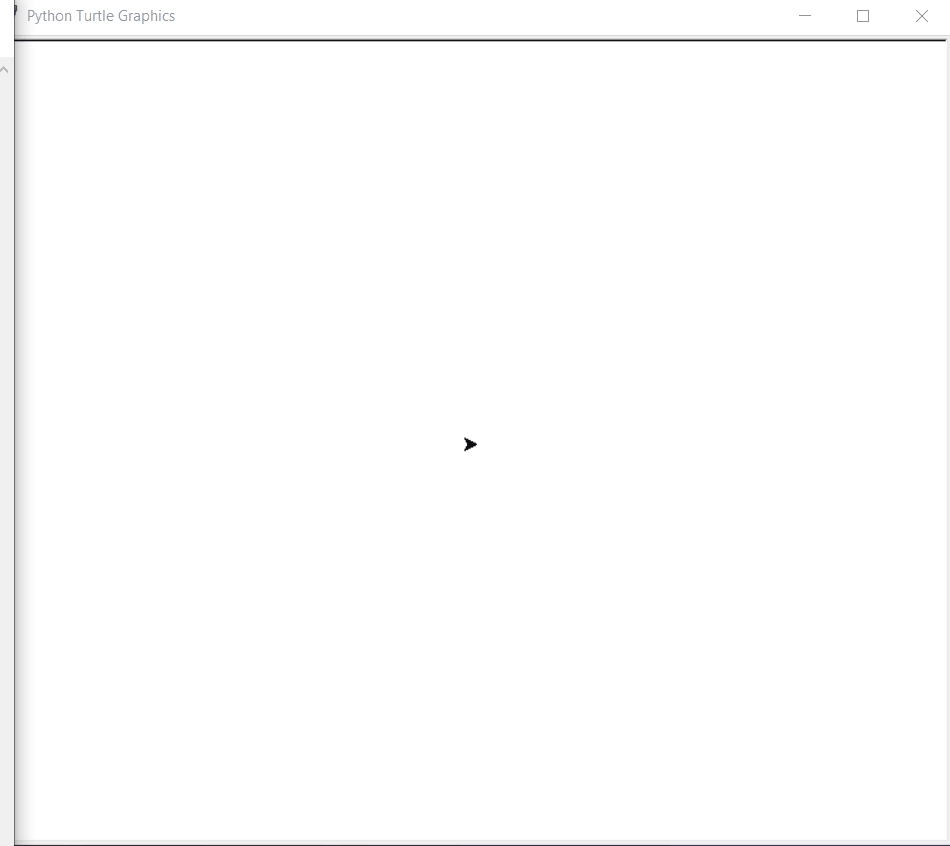

### Operations of different search algorithms 

- Opperations of different algorithms depend on the search method we use. If we use A* algorithm, it will start an initilizer, follow a systematic approach and compare it with others and then decide the path. In our code, it will start in a position, then compare the angle of rotation and then choose the shortest path. If we use depth first search, we go through the starting position to the ending position. After finishing all the angular position, we will decide the directional procedure. In, breadth first search, we go through the adjacent all the nodes at first, then we take decision about the path of the process.

###  Depth-first search (DFS) :
- DFS is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking.

- A version of depth-first search was investigated in the 19th century by French mathematician Charles Pierre Trémaux as a strategy for solving mazes.

### Breadth First Search(BFS): 

- Breadth-first search (BFS) is an algorithm for searching a tree data structure for a node that satisfies a given property. It starts at the tree root and explores all nodes at the present depth prior to moving on to the nodes at the next depth level. Extra memory, usually a queue, is needed to keep track of the child nodes that were encountered but not yet explored.

- For example, in a chess endgame a chess engine may build the game tree from the current position by applying all possible moves, and use breadth-first search to find a win position for white. Implicit trees (such as game trees or other problem-solving trees) may be of infinite size; breadth-first search is guaranteed to find a solution node[1] if one exists.

- In contrast, (plain) depth-first search, which explores the node branch as far as possible before backtracking and expanding other nodes,[2] may get lost in an infinite branch and never make it to the solution node. Iterative deepening depth-first search avoids the latter drawback at the price of exploring the tree's top parts over and over again. On the other hand, both depth-first algorithms get along without extra memory.

- Breadth-first search can be generalized to graphs, when the start node (sometimes referred to as a 'search key') is explicitly given, and precautions are taken against following a vertex twice.